In [106]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. Target Variable Analysis (quality)
● Distribution:
○ Consider grouping into low, medium, and high quality for classification.
● Binning Quality Scores:
○ Convert quality into categories (e.g., bad, average, excellent) and
analyze.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure seaborn aesthetics
sns.set(style="whitegrid", palette="muted")

# Load the red and white wine datasets (assuming the files are in your working directory)
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to indicate the wine type
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine both datasets into a single DataFrame for unified analysis
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

# Verify by printing the first few rows
print(wine_df.head())


  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  \
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                                  
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                                  
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                                  
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  

  type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            NaN

In [108]:
# Define bins for categorization. Here we consider:
#   - 'low' quality: scores from 0 to 4,
#   - 'medium' quality: scores from 5 to 6,
#   - 'high' quality: scores from 7 to 10.
bins = [0, 4, 6, 10]
labels = ['low', 'medium', 'high']

# Create a new categorical column for wine quality
wine_df['quality_category'] = pd.cut(wine_df['quality'], bins=bins, labels=labels, include_lowest=True)

# Check the result by printing a few rows of the new column along with the original quality score
print(wine_df[['quality', 'quality_category']].head())


   quality quality_category
0      NaN              NaN
1      NaN              NaN
2      NaN              NaN
3      NaN              NaN
4      NaN              NaN


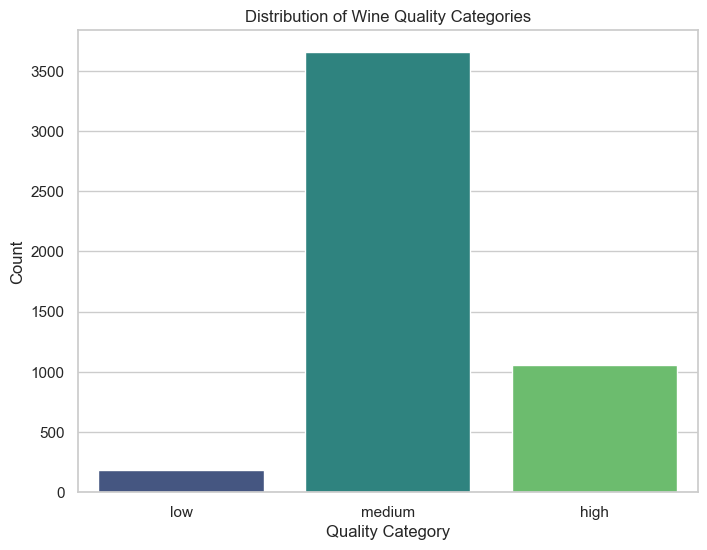

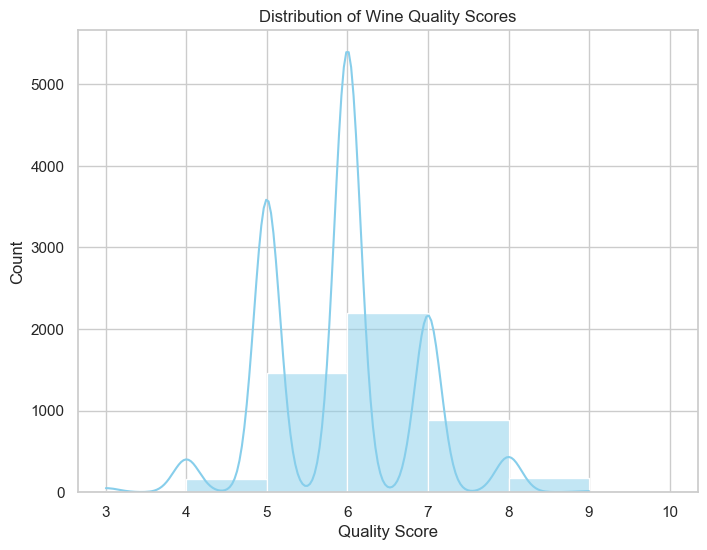

In [109]:
# -----------------------------------------------------------------------------
# Chunk 3: Visualizing the Quality Distributions (Updated to avoid FutureWarning)
# -----------------------------------------------------------------------------

# (a) Plot the distribution of the new quality categories using a count plot.
plt.figure(figsize=(8, 6))
# Assign the x variable to hue and set dodge=False so that bars are not separated by hue levels.
ax = sns.countplot(x='quality_category', data=wine_df, hue='quality_category', palette='viridis', dodge=False)
# Remove the legend to keep the original appearance
if ax.get_legend() is not None:
    ax.legend_.remove()

plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

# (b) Plot the distribution of the original quality scores using a histogram with a KDE overlay.
plt.figure(figsize=(8, 6))
bins_range = range(int(wine_df['quality'].min()), int(wine_df['quality'].max()) + 2)
sns.histplot(wine_df['quality'], bins=bins_range, kde=True, color='skyblue')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()


2. Feature-Target Relationship
● Key Features vs. Quality:
○ Analyze how alcohol, sulphates, volatile acidity, and pH impact
quality.

● Categorical Analysis (type)
○ Compare red vs. white wines in terms of acidity, alcohol, and quality
distribution.

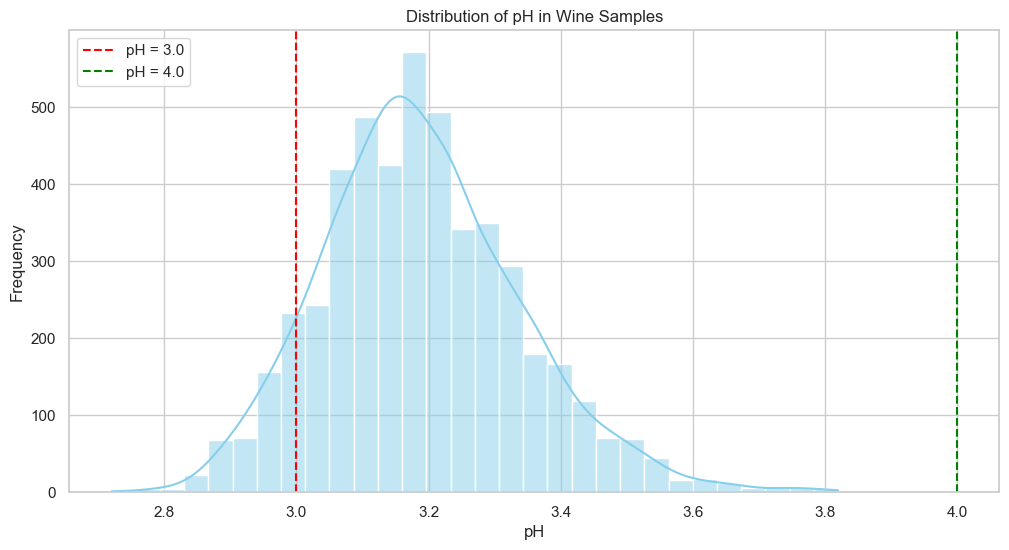

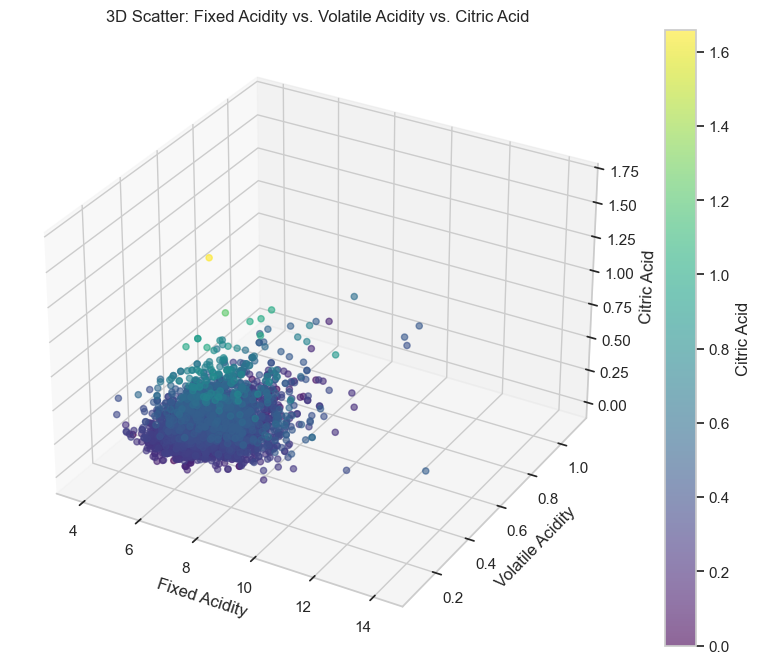

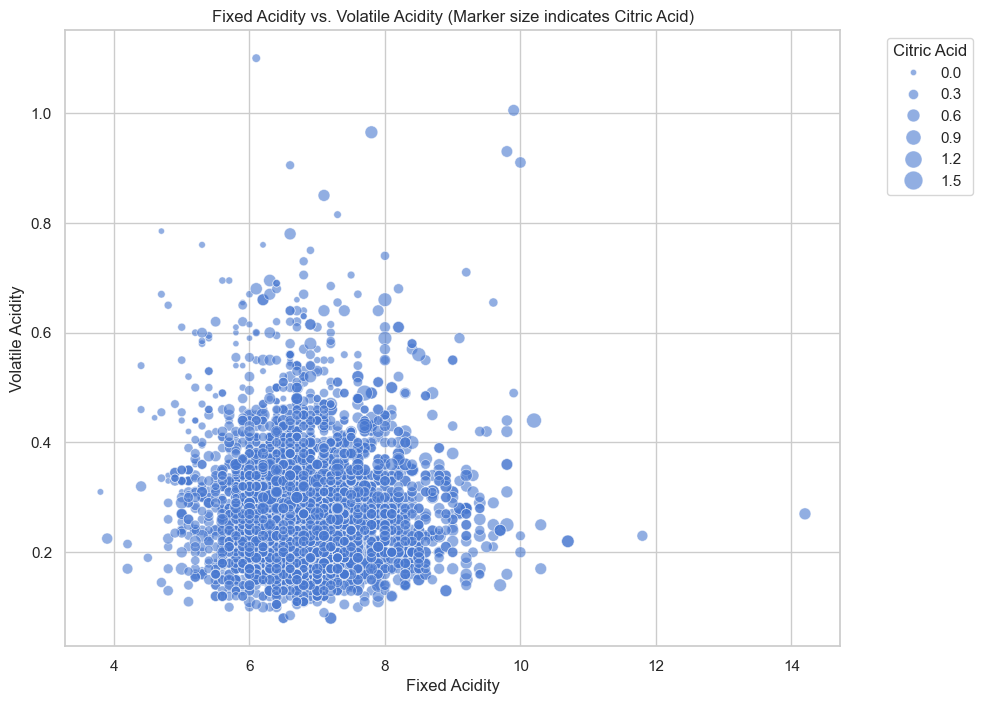

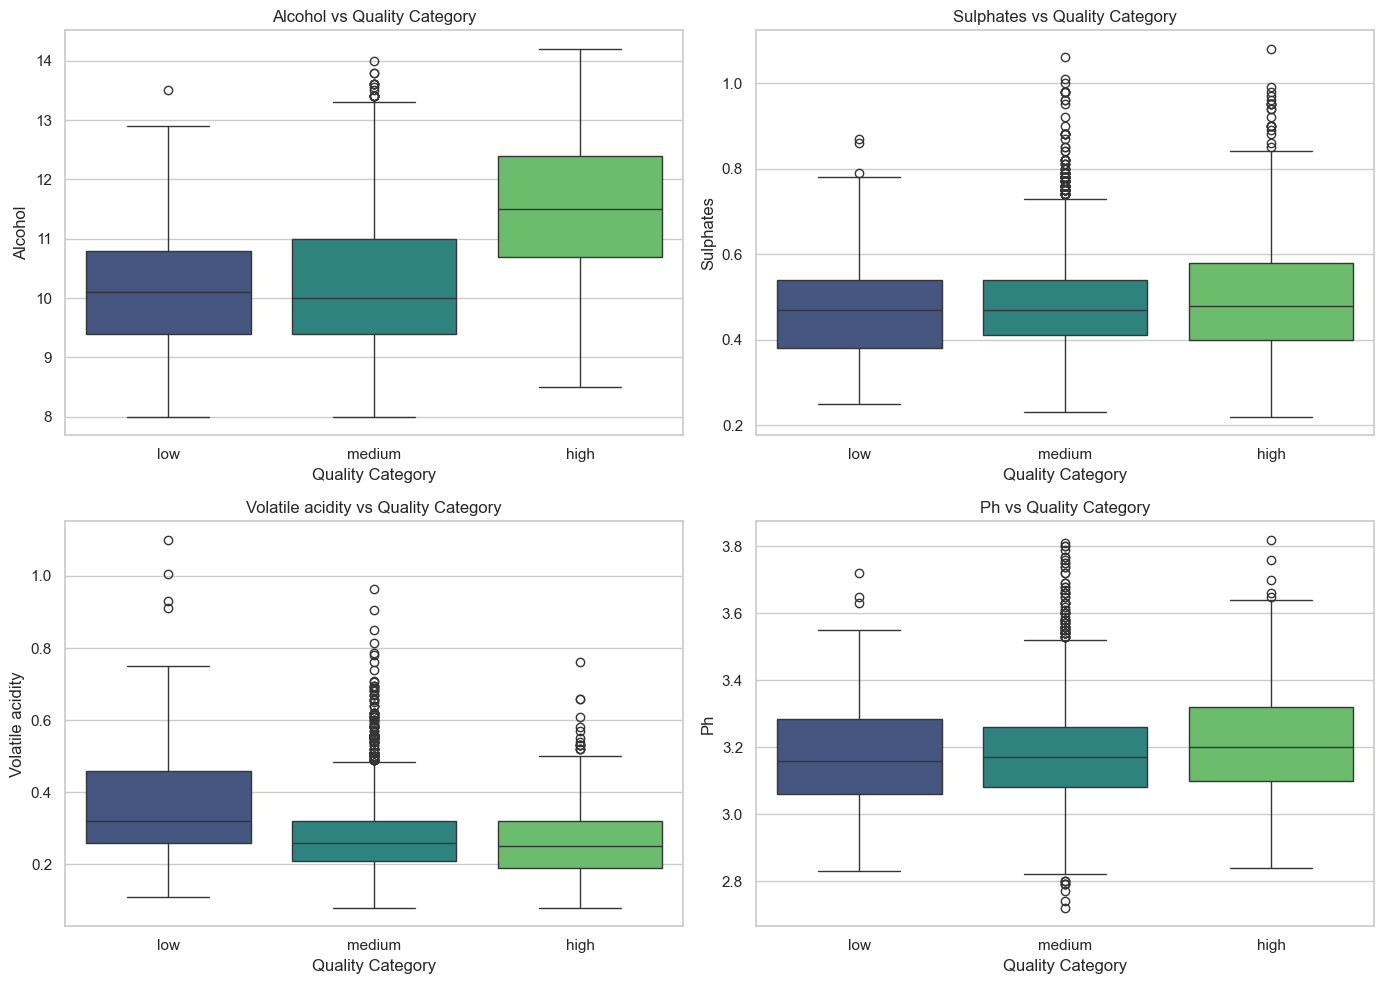

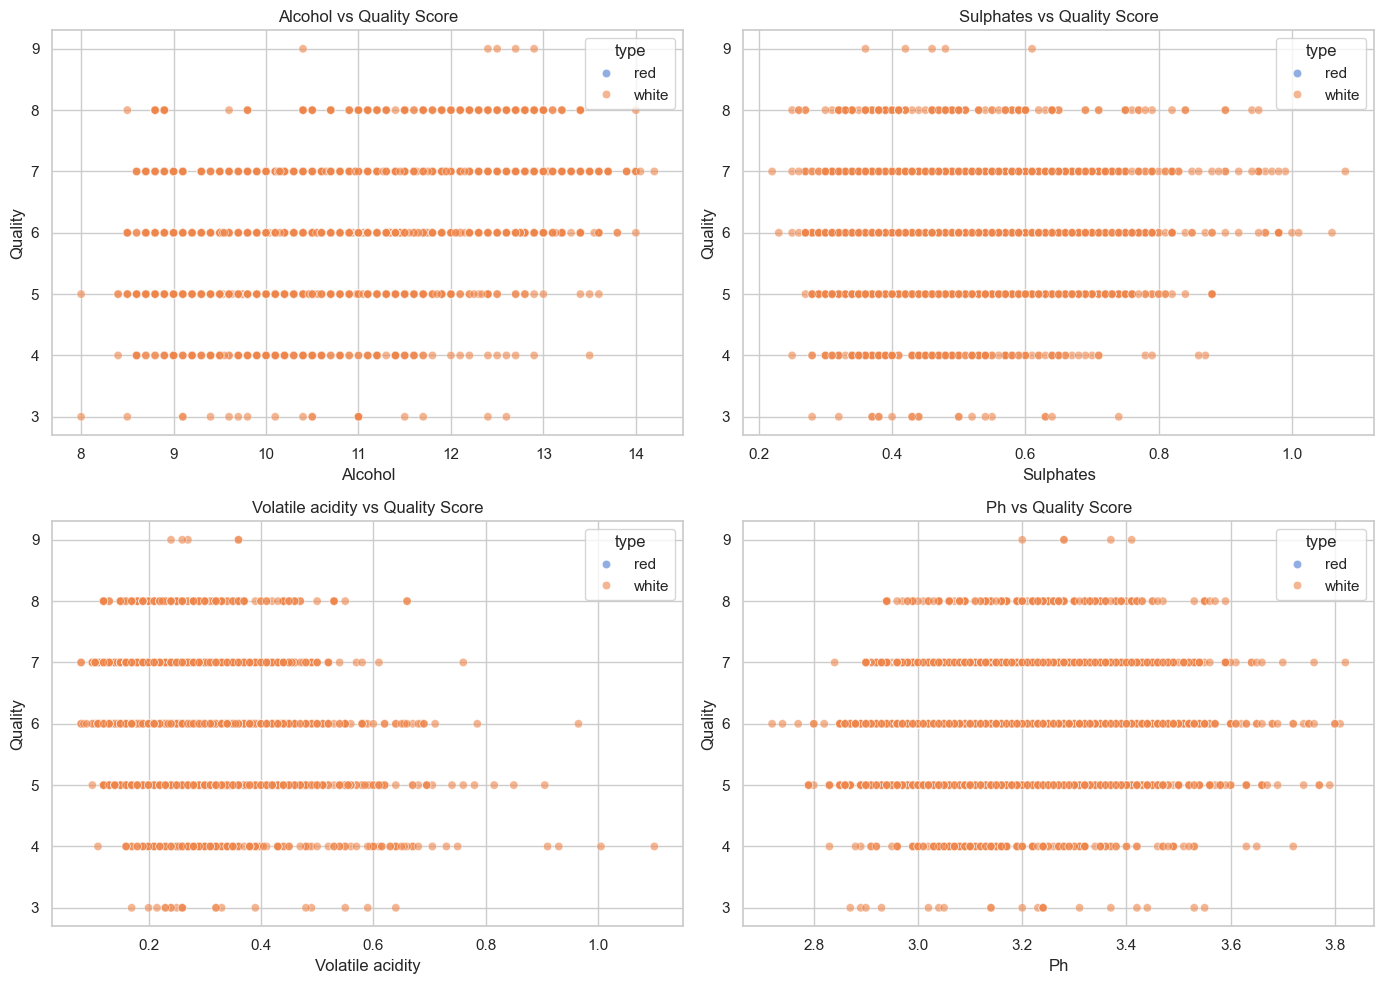

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# ------------------------------
# 1. pH Range & Distribution
# ------------------------------
plt.figure(figsize=(12, 6))
sns.histplot(wine_df['pH'], kde=True, bins=30, color='skyblue')
plt.axvline(3.0, color='red', linestyle='--', label='pH = 3.0')
plt.axvline(4.0, color='green', linestyle='--', label='pH = 4.0')
plt.title('Distribution of pH in Wine Samples')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -----------------------------------------
# 2. Acidity Composition Breakdown
# -----------------------------------------

# (a) 3D Scatter Plot: Fixed Acidity vs. Volatile Acidity vs. Citric Acid
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    wine_df['fixed acidity'],
    wine_df['volatile acidity'],
    wine_df['citric acid'],
    c=wine_df['citric acid'],  # Color by citric acid levels
    cmap='viridis',
    alpha=0.6
)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Citric Acid')
ax.set_title('3D Scatter: Fixed Acidity vs. Volatile Acidity vs. Citric Acid')
plt.colorbar(sc, label='Citric Acid')
plt.show()

# (b) 2D Scatter Plot: Fixed Acidity vs. Volatile Acidity (Marker size indicates Citric Acid)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='fixed acidity',
    y='volatile acidity',
    size='citric acid',
    sizes=(20, 200),
    data=wine_df,
    alpha=0.6,
    legend='brief'
)
plt.title('Fixed Acidity vs. Volatile Acidity (Marker size indicates Citric Acid)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(title='Citric Acid', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# -----------------------------------------
# 3. Key Feature Analysis
# -----------------------------------------
features = ['alcohol', 'sulphates', 'volatile acidity', 'pH']

# (a) Boxplots: Key Feature vs. Binned Quality Category
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    # Assigning the same column to 'hue' avoids the palette warning.
    ax = sns.boxplot(
        x='quality_category', 
        y=feature, 
        data=wine_df, 
        hue='quality_category', 
        palette='viridis', 
        dodge=False
    )
    # Remove the redundant legend since x and hue are identical.
    if ax.get_legend():
        ax.get_legend().remove()
    plt.title(f'{feature.capitalize()} vs Quality Category')
    plt.xlabel('Quality Category')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

# (b) Scatter Plots: Key Feature vs. Original Quality Score (Differentiated by Wine Type)
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(
        x=feature, 
        y='quality', 
        data=wine_df, 
        hue='type', 
        alpha=0.6
    )
    plt.title(f'{feature.capitalize()} vs Quality Score')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Quality')
plt.tight_layout()
plt.show()


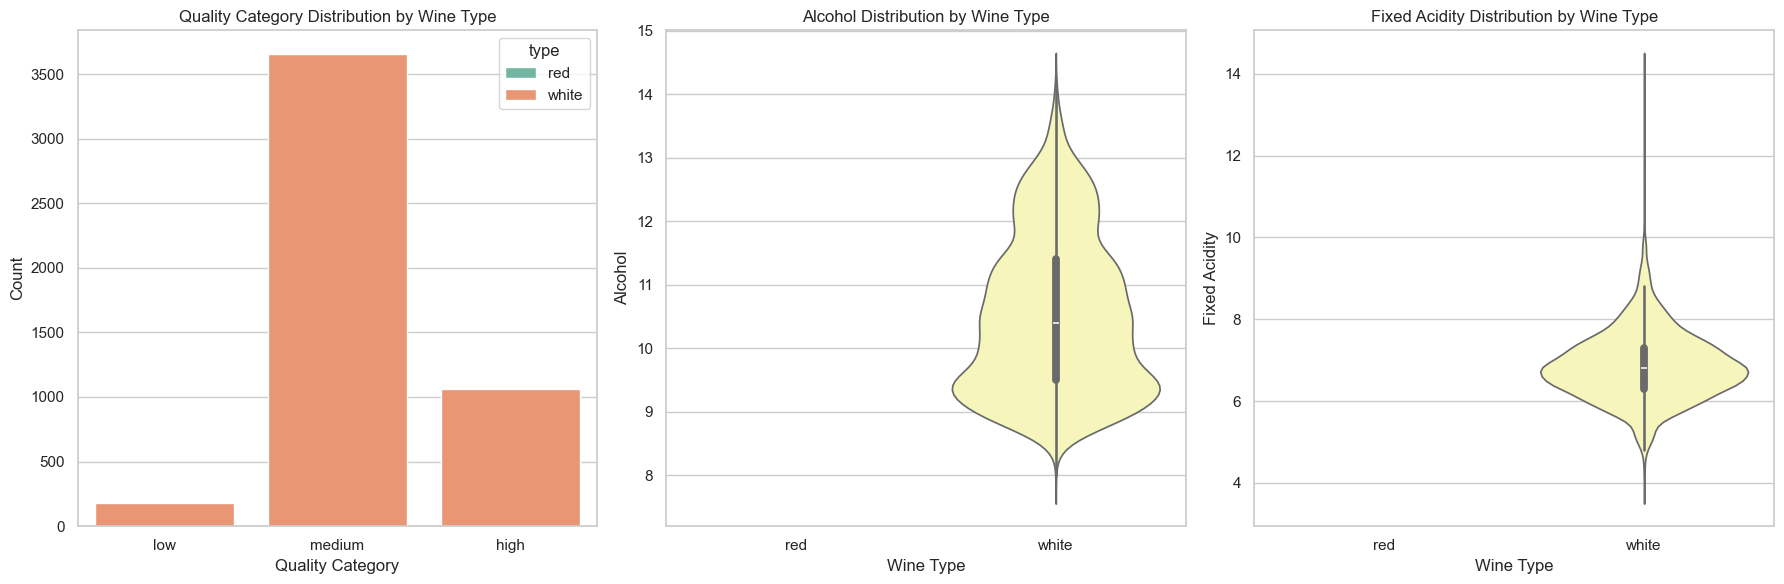

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# ----- Panel 1: Quality Distribution by Wine Type -----
plt.subplot(1, 3, 1)
sns.countplot(x='quality_category', hue='type', data=wine_df, palette='Set2')
plt.title('Quality Category Distribution by Wine Type')
plt.xlabel('Quality Category')
plt.ylabel('Count')

# ----- Panel 2: Alcohol Distribution by Wine Type -----
plt.subplot(1, 3, 2)
# To avoid the FutureWarning, we assign the same variable to hue.
ax2 = sns.violinplot(x='type', y='alcohol', data=wine_df, hue='type', 
                      palette='Set3', dodge=False)
# Remove the redundant legend.
if ax2.get_legend():
    ax2.get_legend().remove()
plt.title('Alcohol Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')

# ----- Panel 3: Acidity Distribution by Wine Type -----
# Using 'fixed acidity' as a representative measure of acidity.
plt.subplot(1, 3, 3)
ax3 = sns.violinplot(x='type', y='fixed acidity', data=wine_df, hue='type', 
                      palette='Set3', dodge=False)
if ax3.get_legend():
    ax3.get_legend().remove()
plt.title('Fixed Acidity Distribution by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Fixed Acidity')

plt.tight_layout()
plt.show()


3. Feature Interactions
● Pairwise Feature Relationships:
○ fixed acidity vs. pH: Check how acidity affects pH balance.
○ alcohol vs. quality: Higher alcohol content may correlate with better
wine.
○ density vs. alcohol: High-density wines may have lower alcohol content.

Text(0, 0.5, 'pH')

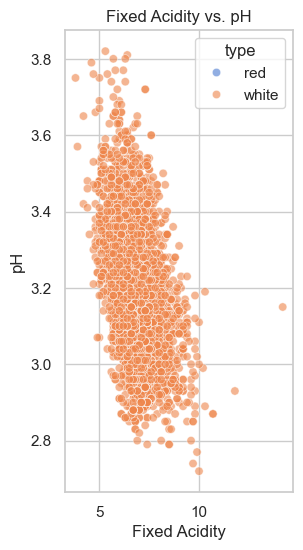

In [112]:
plt.subplot(1, 3, 1)
sns.scatterplot(x='fixed acidity', y='pH', data=wine_df, hue='type', alpha=0.6)
plt.title('Fixed Acidity vs. pH')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')


Text(0, 0.5, 'Quality')

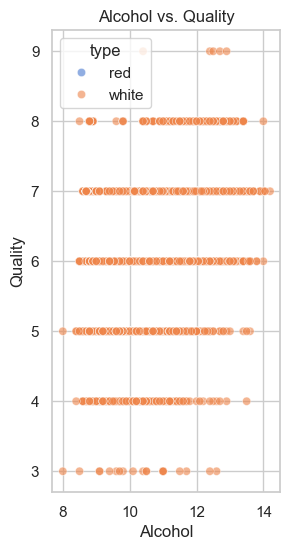

In [113]:
plt.subplot(1, 3, 2)
sns.scatterplot(x='alcohol', y='quality', data=wine_df, hue='type', alpha=0.6)
plt.title('Alcohol vs. Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')


Text(0, 0.5, 'Density')

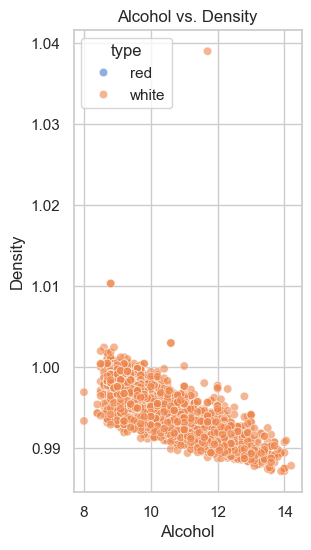

In [114]:
plt.subplot(1, 3, 3)
sns.scatterplot(x='alcohol', y='density', data=wine_df, hue='type', alpha=0.6)
plt.title('Alcohol vs. Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')


4. pH and Acidity Analysis
● pH Range & Distribution:
○ Verify if most wines fall in the typical pH range (3.0–4.0).
● Acidity Composition Breakdown:
○ fixed acidity vs. volatile acidity vs. citric acid interaction.

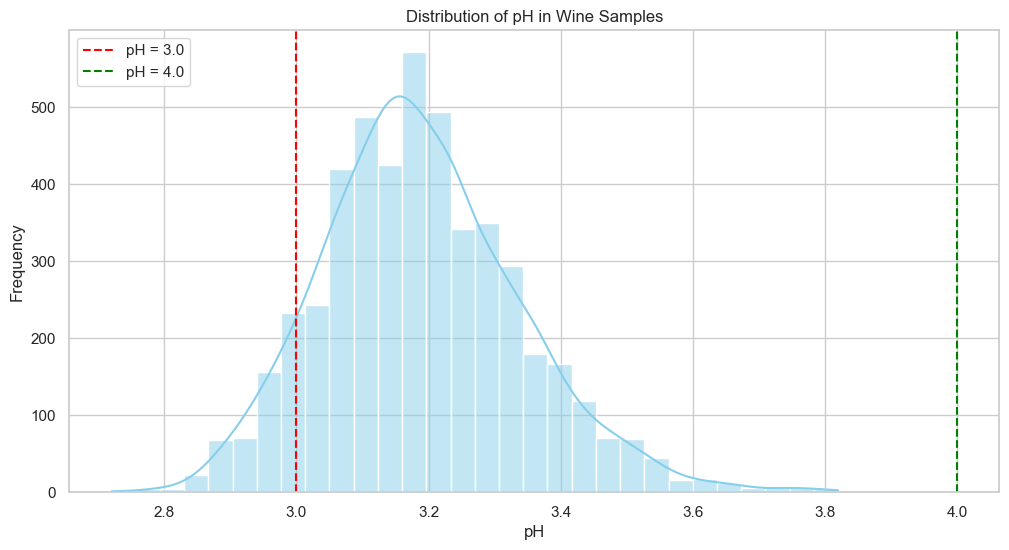

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(wine_df['pH'], kde=True, bins=30, color='skyblue')
plt.axvline(3.0, color='red', linestyle='--', label='pH = 3.0')
plt.axvline(4.0, color='green', linestyle='--', label='pH = 4.0')
plt.title('Distribution of pH in Wine Samples')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()


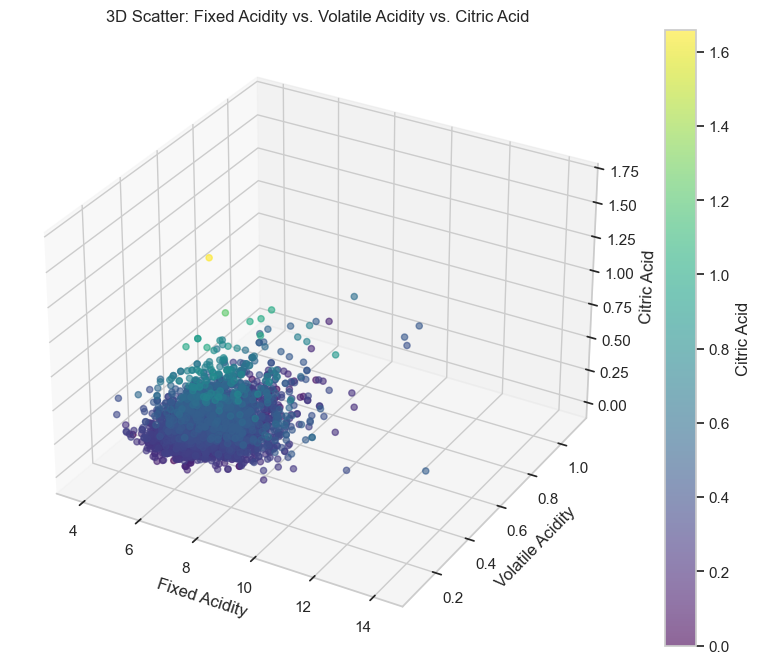

In [116]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    wine_df['fixed acidity'],
    wine_df['volatile acidity'],
    wine_df['citric acid'],
    c=wine_df['citric acid'],  # Color by citric acid levels
    cmap='viridis',
    alpha=0.6
)

ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Citric Acid')
ax.set_title('3D Scatter: Fixed Acidity vs. Volatile Acidity vs. Citric Acid')
plt.colorbar(sc, label='Citric Acid')
plt.show()


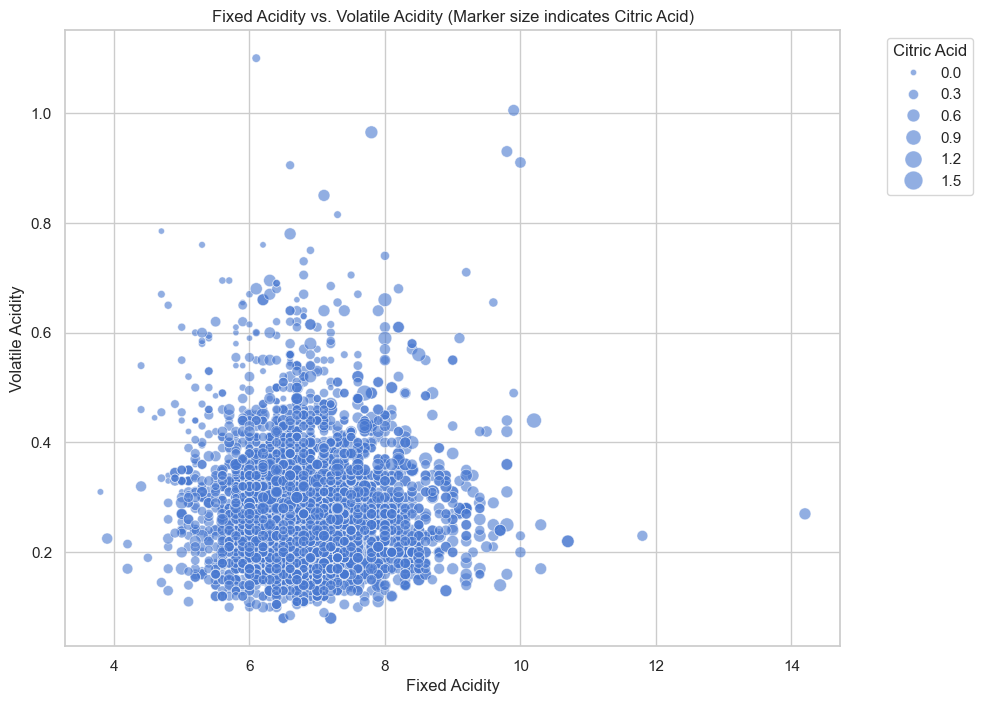

In [117]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='fixed acidity',
    y='volatile acidity',
    size='citric acid',
    sizes=(20, 200),
    data=wine_df,
    alpha=0.6,
    legend='brief'
)
plt.title('Fixed Acidity vs. Volatile Acidity (Marker size indicates Citric Acid)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(title='Citric Acid', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


5. Sulfur Dioxide Effects
● Free vs. Total Sulfur Dioxide:
○ Identify if higher sulfur levels correlate with preservation or quality.
● Sulfur Dioxide and pH Relationship:
○ Assess if sulfur dioxide stabilizes pH levels in different wine types.

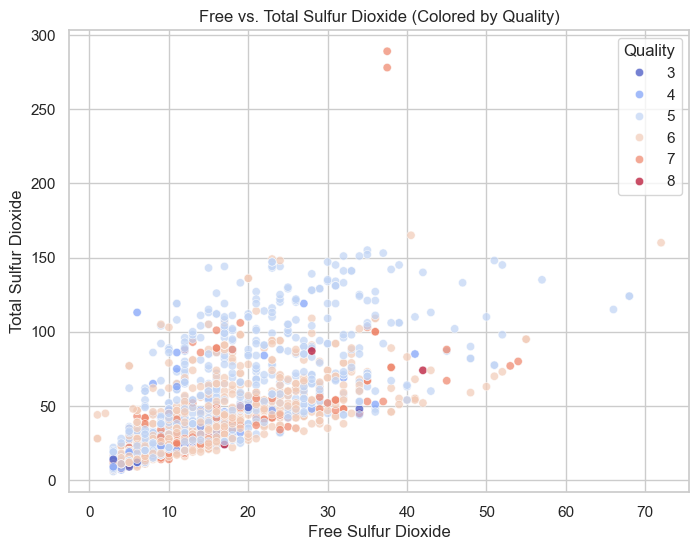

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_red['free sulfur dioxide'], y=df_red['total sulfur dioxide'], hue=df_red['quality'], palette='coolwarm', alpha=0.7)
plt.title("Free vs. Total Sulfur Dioxide (Colored by Quality)")
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Total Sulfur Dioxide")
plt.legend(title="Quality")
plt.show()


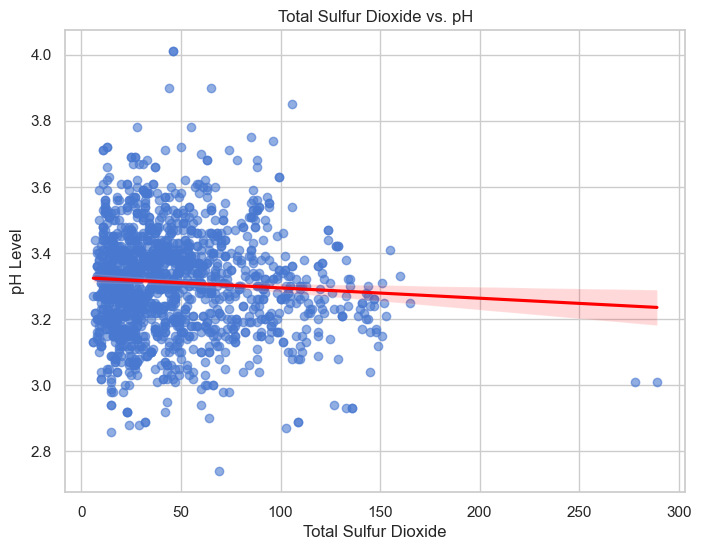

In [119]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_red['total sulfur dioxide'], y=df_red['pH'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Total Sulfur Dioxide vs. pH")
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("pH Level")
plt.show()


6. Density Analysis

● Density vs. Sugar Content:
○ Higher residual sugar should increase density—verify this relationship.
● Density vs. Alcohol:
○ Alcohol is lighter than water, so higher alcohol content should lower
density.

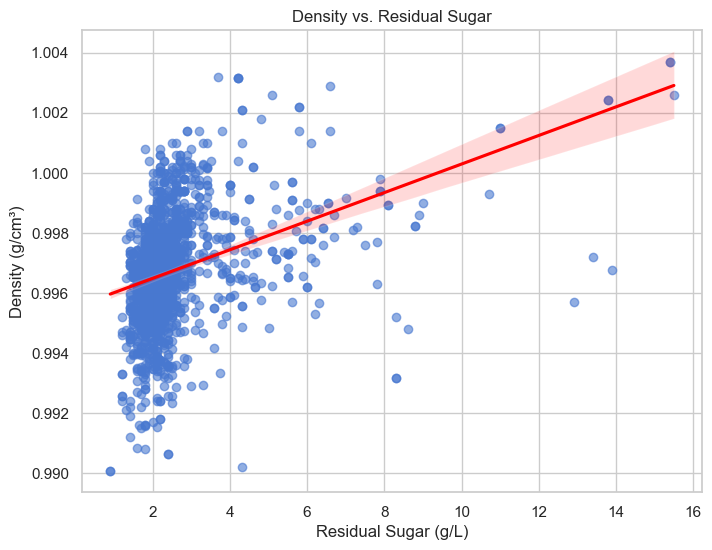

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=df_red['residual sugar'], y=df_red['density'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Density vs. Residual Sugar")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Density (g/cm³)")
plt.show()


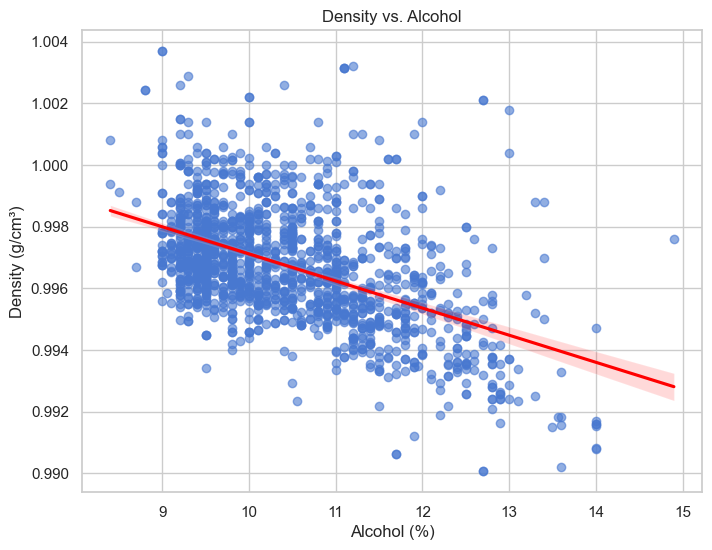

In [121]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_red['alcohol'], y=df_red['density'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Density vs. Alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Density (g/cm³)")
plt.show()


7. Feature Engineering
● New Features for Prediction:
○ Acidity Ratio = (fixed acidity / volatile acidity)
○ Sulfur Balance = (free sulfur dioxide / total sulfur dioxide)
○ Sugar-Alcohol Ratio = (residual sugar / alcohol)

In [122]:
# Creating new engineered features
df_red['acidity_ratio'] = df_red['fixed acidity'] / df_red['volatile acidity']
df_red['sulfur_balance'] = df_red['free sulfur dioxide'] / df_red['total sulfur dioxide']
df_red['sugar_alcohol_ratio'] = df_red['residual sugar'] / df_red['alcohol']

# Display the first few rows to verify
df_red[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].head()


,acidity_ratio,sulfur_balance,sugar_alcohol_ratio
0,10.571429,0.323529,0.202128
1,8.863636,0.373134,0.265306
2,10.263158,0.277778,0.234694
3,40.000000,0.283333,0.193878
4,10.571429,0.323529,0.202128


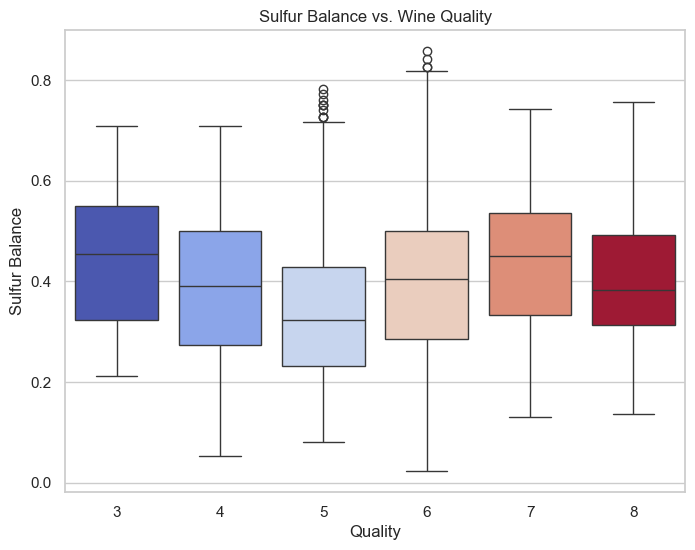

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='sulfur_balance', hue='quality', data=df_red, palette="coolwarm", legend=False)
plt.title("Sulfur Balance vs. Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Sulfur Balance")
plt.show()


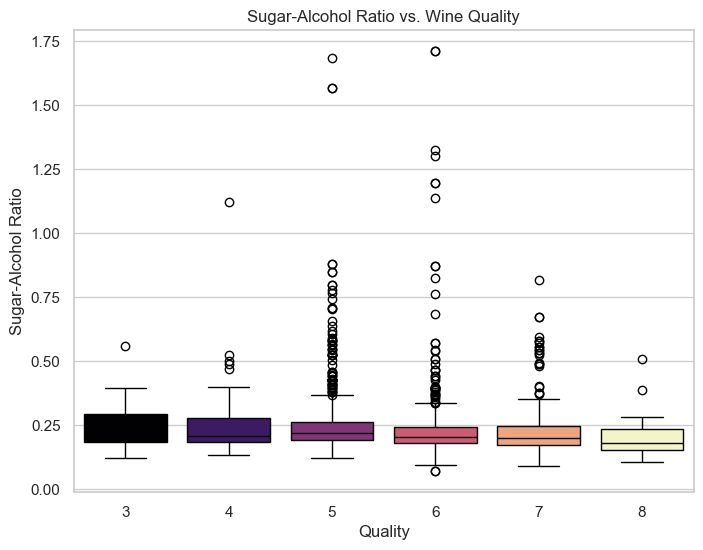

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='sugar_alcohol_ratio', hue='quality', data=df_red, palette="magma", legend=False)
plt.title("Sugar-Alcohol Ratio vs. Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Sugar-Alcohol Ratio")
plt.show()
